In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**This is an interesting task, I have experienced a lot, including writing code with colab, because the caltech256 data set is particularly large, split it into four 4GB files by pickle, and then to shorten the time of each raw data read, first time When reading, the data is saved to a CSV file, so that when the program is tested later, it can be read directly from the CSV file, but the CSV file is particularly large, and the x_train.csv file size is 16 GB, which directly causes the RAM to explode, and then more I tried to directly read the data in the pickle file, split it into the train and test parts, and finally run the program. The RAM usage is 25.33GB, and the total RAM is only 25.51GB. And because of the excessive use of colab GPU resources, Google has blocked the account. But in the end, after asking classmates and Dr.yang, as well as online to find a solution, finally successfully used the VGG16 to train the caltech256 data set.**

# There are two parts : the first one is training from scratch the accuracy is 24% the second one is training from pre-trained the accuracy is 55.7%

In [6]:
!/opt/bin/nvidia-smi

Sun Nov 10 22:24:40 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    25W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

# **Load the dataset from pickle file**

By  http://places2.csail.mit.edu/PAMI_places  (given by Dr.yang)and reference code ,learning the method to generate the training and testing dataset.

In [0]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tarfile
import cv2
import pickle
%matplotlib inline
import tarfile
%matplotlib inline

load the picklepath from google drive

In [0]:
import os
picklepath ='/content/drive/My Drive/Colab Notebooks/VGG16_Practice/pickle'
os.chdir(picklepath)

Using data_process.ipnyb divide data to four pickle file , so I should load those file

In [0]:
import pickle
pickle_in = open("pickle_all_images_df1.pickle","rb")
all_images_df1 = pickle.load(pickle_in)

In [0]:
pickle_in = open("pickle_all_images_df2.pickle","rb")
all_images_df2 = pickle.load(pickle_in)

In [0]:
pickle_in = open("pickle_all_images_df3.pickle","rb")
all_images_df3 = pickle.load(pickle_in)

In [0]:
pickle_in = open("pickle_all_classes.pickle","rb")
all_classes = pickle.load(pickle_in)

set the img size is 128

In [0]:
img_size = 128

concatenate those four array together

In [0]:
all_images = np.concatenate((all_images_df1, all_images_df2,all_images_df3), axis=0)

In [10]:
all_images.shape

(30607, 49152)

del those pre-data, in order to release RAM

In [0]:
del all_images_df1
del all_images_df2
del all_images_df3

In [12]:
all_images.shape

(30607, 49152)

In [0]:
all_images.shape

In [0]:
# train_total = np.concatenate((train_x, train_y), axis=1)
# test_total = np.concatenate((test_x, test_y), axis=1)
# df_train = pd.DataFrame(train_total)
# df_test = pd.DataFrame(test_total)

using pandas to implement one hot encode

In [0]:
all_classes = pd.get_dummies(all_classes) 


In [14]:
all_classes.shape

(30607, 257)

In [0]:
all_images = np.array(all_images)

In [16]:
all_images.shape

(30607, 49152)

split all_images to X_train part and X_test part. split all_classes to y_train part and y_test part

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(all_images, all_classes, test_size=0.1)

In [19]:
X_train.shape

(27546, 49152)

In [15]:
X_test.shape

(3061, 49152)

In [23]:
y_train.shape

(27546, 257)

In [24]:
y_test.shape

(3061, 257)

In [0]:
X_train[0].shape

Because using VGG16 network,so I should fit the dimension,so using reshape method to change dimension

In [0]:
X_train = X_train.reshape(-1,img_size,img_size,3)

In [21]:
X_train.shape

(27546, 128, 128, 3)

In [0]:
X_test = X_test.reshape(-1,img_size,img_size,3)

In [21]:
X_test.shape

(3061, 128, 128, 3)

# **Save X_train, X_test, y_train, y_test to CSV file**

In [0]:
df_x_train = pd.DataFrame(X_train)
df_x_test = pd.DataFrame(X_test)
df_y_train = pd.DataFrame(y_train)
df_y_test = pd.DataFrame(y_test)


In [0]:
df_x_train.to_csv('/content/drive/My Drive/Colab Notebooks/VGG16_Practice/x_train.csv')

In [0]:
df_x_test.to_csv('/content/drive/My Drive/Colab Notebooks/VGG16_Practice/x_test.csv')

In [0]:
df_y_train.to_csv('/content/drive/My Drive/Colab Notebooks/VGG16_Practice/y_train.csv')

In [0]:
df_y_test.to_csv('/content/drive/My Drive/Colab Notebooks/VGG16_Practice/y_test.csv')

In [0]:
del df_x_test
del df_y_train
del df_y_test

# **Load train_x test_x train_y test_y from CSV**

In [0]:
import numpy as np
import pandas as pd

In [0]:
train_x = pd.read_csv('/Users/wangxiang/Code/Jupyter/VGG16_Practice/pickle/x_trainData.csv', index_col=None)

In [0]:
test_x = pd.read_csv('/Users/wangxiang/Code/Jupyter/VGG16_Practice/pickle/x_testData.csv', index_col=None)

In [0]:
train_y = pd.read_csv('/Users/wangxiang/Code/Jupyter/VGG16_Practice/pickle/y_trainData.csv', index_col=None)

In [0]:
test_y = pd.read_csv('/Users/wangxiang/Code/Jupyter/VGG16_Practice/pickle/y_testData.csv', index_col=None)

In [0]:
train_x = train_x.values
(train_x.shape)

In [0]:
# X_train = [cv2.cvtColor(cv2.resize(i,(224,224)), cv2.COLOR_GRAY2BGR) for i in X_train]
# X_train = np.concatenate([arr[np.newaxis] for arr in X_train]).astype('float32')
 
# X_test  = [cv2.cvtColor(cv2.resize(i,(224,224)), cv2.COLOR_GRAY2BGR) for i in X_test ]
# X_test  = np.concatenate([arr[np.newaxis] for arr in X_test] ).astype('float32')

# print("X_train shape :",X_train.shape)
# print("X_test shape:",X_test.shape)

# **Normalize the images Section**

If you execute the following code, the accuracy will be reduced to 10%


In [22]:
from tensorflow.keras.applications.vgg16 import preprocess_input

X_test = preprocess_input(X_test)
X_train = preprocess_input(X_train)

# **VGG16 from Scratch**

### this part using VGG16 model without weights  

In [0]:
import os
import keras
from keras.models import Model
from keras.layers import Dense,Flatten,Dropout
from keras import datasets
from keras.applications.vgg16 import VGG16

Setting weights=None and layer.trainable=True,which is important

In [42]:
model = VGG16(weights=None, include_top=False, input_shape=(128,128,3), classes=257)
for layer in model.layers:
  layer.trainable=True
print(model.summary())

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

Setting top-layer:add three Dense layer,especially the last Dense layer is softmax layer with 257 neruons to classify label

In [0]:
from keras.layers import Flatten, Dense
from keras.models import Model

x = model.get_layer('block5_pool').output
x = Flatten(name='flatten')(x)
x = Dense(512, activation='relu', name='fc1')(x)
x = Dense(4096, activation='relu', name='fc2')(x)
x = Dense(257, activation='softmax', name='predictions')(x)

model_caltech_vgg = Model(inputs=model.input, outputs=x)

In [44]:
model_caltech_vgg.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0   

In [0]:
def learning_rate_schedule(epoch):
    if epoch <= 10:
        return 1e-4 # 0.00001
    elif epoch <= 20:
        return 1e-5
    elif epoch <= 30:
        return 1e-6
    else:
        return 1e-7
    return LR

In [0]:
from keras import optimizers
from keras.callbacks import EarlyStopping


setting epochs=30 and each batch_size=32

In [47]:
model_caltech_vgg.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.adam(lr=0.0001), metrics=['accuracy']
)
keras.callbacks.LearningRateScheduler(learning_rate_schedule)
history = model_caltech_vgg.fit(
    X_train, y_train,
    batch_size=32, shuffle=True, epochs=30,
    validation_data=(X_test, y_test)
)
    

Train on 27546 samples, validate on 3061 samples
Epoch 1/30
27546/27546 [==============================] - 88s 3ms/step - loss: 5.2240 - acc: 0.0565 - val_loss: 4.9047 - val_acc: 0.0856
Epoch 2/30
27546/27546 [==============================] - 83s 3ms/step - loss: 4.6146 - acc: 0.1212 - val_loss: 4.4271 - val_acc: 0.1297
Epoch 3/30
27546/27546 [==============================] - 82s 3ms/step - loss: 4.1492 - acc: 0.1747 - val_loss: 4.0834 - val_acc: 0.1875
Epoch 4/30
27546/27546 [==============================] - 82s 3ms/step - loss: 3.7570 - acc: 0.2279 - val_loss: 3.9624 - val_acc: 0.2130
Epoch 5/30
27546/27546 [==============================] - 82s 3ms/step - loss: 3.3785 - acc: 0.2803 - val_loss: 3.8363 - val_acc: 0.2411
Epoch 6/30
27546/27546 [==============================] - 82s 3ms/step - loss: 2.9286 - acc: 0.3484 - val_loss: 3.7786 - val_acc: 0.2509
Epoch 7/30
27546/27546 [==============================] - 83s 3ms/step - loss: 2.3888 - acc: 0.4405 - val_loss: 3.9854 - val_acc:

**By train 30 epochs the VGG16 from scratch model give me 28.29% testing accuracy**

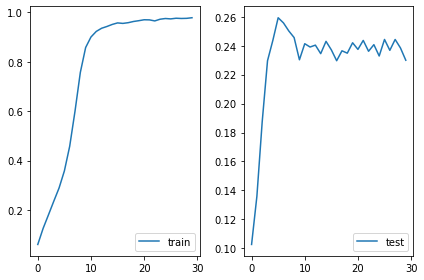

In [31]:
import matplotlib.pyplot as plt
import numpy as np

plt.subplot(1, 2, 1)
plt.plot(history.history['acc'])
plt.legend(['train'], loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['val_acc'])
plt.legend(['test'], loc='lower right')

plt.tight_layout() 

plt.show()



# **VGG16 Pre-trained**

this part using VGG16 pre-trained model and run 3 times

In [32]:
model = VGG16(weights='imagenet', include_top=False, input_shape=(128,128,3), classes=257)

for layer in model.layers:
    layer.trainable = False
print(model.summary())

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

Setting top layer : three Dense layer and last layer is softmax layer

In [0]:
from keras.layers import Flatten, Dense
from keras.models import Model

x = model.get_layer('block5_pool').output
x = Flatten(name='flatten')(x)
x = Dense(512, activation='relu', name='fc1')(x)
x = Dense(4096, activation='relu', name='fc2')(x)
x = Dense(257, activation='softmax', name='predictions')(x)
model_updated = Model(inputs=model.input, outputs=x)
#model_caltech_vgg_pre = Model(inputs=model.input, outputs=x)

In [0]:
def learning_rate_schedule(epoch):
    if epoch <= 10:
        return 1e-4 # 0.00001
    elif epoch <= 20:
        return 1e-5
    elif epoch <= 30:
        return 1e-6
    else:
        return 1e-7
    return LR

save weights for each time

In [0]:
model_updated.save_weights('model_caltech_initial.h5')

In [0]:
from keras import optimizers
from keras.callbacks import EarlyStopping

In [39]:
model_updated.save_weights('model_caltech_initial.h5')
training_runs = []
for i in range(3):
    #model_updated.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
    model_updated.compile(loss='mean_squared_error', optimizer=optimizers.adam(lr=0.0001), metrics=['accuracy'])
    keras.callbacks.LearningRateScheduler(learning_rate_schedule)
    history = model_updated.fit(X_train, y_train, batch_size=32,shuffle=True, verbose=1, epochs=10, validation_data=(X_test, y_test))
    training_runs.append(history)
    model_updated.get_weights()
    if i == 2:
        model_updated.save_weights('model1.h5')
    else:
        model_updated.load_weights('model_caltech_initial.h5')
    print()

Train on 27546 samples, validate on 3061 samples
Epoch 1/10
27546/27546 [==============================] - 38s 1ms/step - loss: 0.0036 - acc: 0.1293 - val_loss: 0.0034 - val_acc: 0.1973
Epoch 2/10
27546/27546 [==============================] - 35s 1ms/step - loss: 0.0031 - acc: 0.3033 - val_loss: 0.0029 - val_acc: 0.3728
Epoch 3/10
27546/27546 [==============================] - 35s 1ms/step - loss: 0.0026 - acc: 0.4542 - val_loss: 0.0025 - val_acc: 0.4655
Epoch 4/10
27546/27546 [==============================] - 35s 1ms/step - loss: 0.0022 - acc: 0.5458 - val_loss: 0.0024 - val_acc: 0.4959
Epoch 5/10
27546/27546 [==============================] - 35s 1ms/step - loss: 0.0019 - acc: 0.6105 - val_loss: 0.0022 - val_acc: 0.5407
Epoch 6/10
27546/27546 [==============================] - 35s 1ms/step - loss: 0.0017 - acc: 0.6597 - val_loss: 0.0022 - val_acc: 0.5534
Epoch 7/10
27546/27546 [==============================] - 35s 1ms/step - loss: 0.0015 - acc: 0.6986 - val_loss: 0.0022 - val_acc:

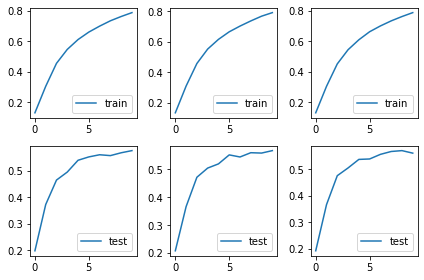

Average training accuracy: 0.7883661269576123
Average testing accuracy: 0.5682238921106063


In [40]:
import matplotlib.pyplot as plt
import numpy as np

plt.subplot(2, 3, 1)
plt.plot(training_runs[0].history['acc'])
plt.legend(['train'], loc='lower right')

plt.subplot(2, 3, 2)
plt.plot(training_runs[1].history['acc'])
plt.legend(['train'], loc='lower right')

plt.subplot(2, 3, 3)
plt.plot(training_runs[2].history['acc'])
plt.legend(['train'], loc='lower right')

plt.subplot(2, 3, 4)
plt.plot(training_runs[0].history['val_acc'])
plt.legend(['test'], loc='lower right')

plt.subplot(2, 3, 5)
plt.plot(training_runs[1].history['val_acc'])
plt.legend(['test'], loc='lower right')

plt.subplot(2, 3, 6)
plt.plot(training_runs[2].history['val_acc'])
plt.legend(['test'], loc='lower right')

plt.tight_layout() 

plt.show()

print("Average training accuracy: {}".format(np.mean([training_runs[0].history['acc'][-1], 
                                                     training_runs[1].history['acc'][-1], training_runs[2].history['acc'][-1]])))
print("Average testing accuracy: {}".format(np.mean([training_runs[0].history['val_acc'][-1], 
                                                     training_runs[1].history['val_acc'][-1], training_runs[2].history['val_acc'][-1]])))

**By Using pre trained model run three times ,The best tesing accuracy performace for each run time is : 56.39% 55.90% 55.05% and average testing accuracy is 55.77%**